### Implementing PCA

####  The module named sklearn.decomposition provides the PCA object which can simply fit and transform the data into Principal components.

In [1]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

# pd.set_option('max_rows', 500)
# pd.set_option('max_columns', 1000)
# np.set_printoptions(suppress=True)

In [3]:
# Import Data
df = pd.read_csv('mnist_012.csv')
df.head()

#column 0 denotes the target variable
#rest all the columns are predictor variables: 784 

#there are 784 predictor variables , we use PCA

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Prepare X and Y
Y = df.loc[:, '0']
X = df.drop(['0'], axis=1)   #PCA works only on predictor variables

print(df.shape)
df.head()

(3147, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X

#does not have any target variable, it becomes unsupervised working

#### This dataset has 784 columns as explanatory variables and one Y variable names '0' which tells what digit the row represents.

- We won’t use the Y when creating the principal components. Because I don’t want the PCA algorithm to know which class (digit) a particular row belongs to.

In [5]:
# PCA
pca = PCA(n_components = 100)
df_pca = pca.fit_transform(X=X)
type(df_pca)

#fit pca on X , but it will also transform the entire dataset to components

numpy.ndarray

In [6]:
df_pca.shape

(3147, 100)

In [7]:
df_pca

array([[ -134.2724107 ,   107.74010173,  -544.92340906, ...,
           29.07781998,    33.25326609,    -2.07796204],
       [ -970.41512047,  -371.81582237,   114.48075447, ...,
          -13.03660244,    51.30820235,    12.64174636],
       [ 1267.52970322,  -263.23020752,   -35.68693198, ...,
          -15.86555799,   -20.45288163,   -37.87724067],
       ...,
       [ 1467.86804663,  -268.85955181,   635.24089145, ...,
            3.81336869,   -45.26202247,   -60.91751397],
       [-1070.02927943,  -119.69307823,   180.7882568 , ...,
           37.44361746,   -26.24715755,     2.49489044],
       [  117.6542393 ,  1291.79042752,  -753.06136813, ...,
            4.63139659,   118.31565994,    31.9209861 ]])

In [8]:
# Store as dataframe and print
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)  #Less than (3147, 784)
df_pca.round(2).head()

(3147, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-134.27,107.74,-544.92,313.08,-500.13,163.35,-223.05,-460.86,1016.40,206.77,...,90.01,47.24,60.51,-13.83,23.66,83.34,83.06,29.08,33.25,-2.08
1,-970.42,-371.82,114.48,-339.01,-53.98,-106.12,19.83,-443.88,-220.42,69.63,...,-57.72,105.09,21.08,-69.53,41.25,-3.50,15.27,-13.04,51.31,12.64
2,1267.53,-263.23,-35.69,612.76,-734.47,267.74,363.05,-130.85,-160.31,-353.75,...,-35.57,52.82,75.87,45.52,-6.67,-8.91,15.01,-15.87,-20.45,-37.88
3,-1066.12,-239.33,137.99,-424.37,-174.55,209.85,57.16,-316.86,-325.03,148.86,...,3.10,-51.21,-32.17,12.66,-16.33,11.50,3.27,2.84,19.02,-16.81
4,1037.18,-427.39,-700.74,-566.28,134.67,-584.41,-546.83,-70.67,52.58,306.40,...,-78.60,5.88,12.70,-24.41,2.60,-1.43,-10.49,-14.68,-87.93,-5.45


#### The first column is the first PC and so on. This dataframe (df_pca) has the same rows as the original data X.

#### Percentage of Variance Explained with each PC
- The PCs are usually arranged in the descending order of the variance(information) explained. To see how much of the total information is contributed by each PC, look at the explained_variance_ratio_ attribute.

- How to read this?

 - PC1 contributed 22%, PC2 contributed 10% and so on.

 - The further you go, the lesser is the contribution to the total variance. Plotting a cumulative sum gives a bigger picture.

In [9]:
# Variance associated to each PC is obtained
v = pca.explained_variance_
v

array([764074.70509694, 333409.88084323, 206248.30545139, 190073.11430869,
       149373.67054257, 140893.79592355, 103478.87643359,  87549.48702637,
        82347.51266608,  66776.33611636,  56734.88041817,  50888.10842031,
        48723.43475235,  44766.34864875,  42979.74063701,  39220.43916158,
        34644.2720122 ,  33867.28940193,  31499.70087288,  29871.85610503,
        27799.10313715,  27094.40783538,  25070.707297  ,  24148.77039605,
        22922.38294344,  22438.22955045,  21647.88928056,  19562.71201744,
        17864.20458509,  17535.62971041,  16732.17816013,  15998.44814048,
        15709.97750735,  14589.53301642,  14294.23663938,  13738.4103659 ,
        12966.46378781,  12211.69498286,  11518.94383008,  11300.48037747,
        10640.45010642,  10370.36850906,  10198.67479495,   9919.57233084,
         9815.14279267,   9249.12095983,   9174.51442452,   8865.24711206,
         8529.54616733,   8433.72801745,   8091.27102221,   7625.26609665,
         7513.0098505 ,  

In [10]:
# This returns the ratio of variance to total variance of the data for each PC
print(pca.explained_variance_ratio_.round(4))

[0.2226 0.0971 0.0601 0.0554 0.0435 0.041  0.0301 0.0255 0.024  0.0195
 0.0165 0.0148 0.0142 0.013  0.0125 0.0114 0.0101 0.0099 0.0092 0.0087
 0.0081 0.0079 0.0073 0.007  0.0067 0.0065 0.0063 0.0057 0.0052 0.0051
 0.0049 0.0047 0.0046 0.0043 0.0042 0.004  0.0038 0.0036 0.0034 0.0033
 0.0031 0.003  0.003  0.0029 0.0029 0.0027 0.0027 0.0026 0.0025 0.0025
 0.0024 0.0022 0.0022 0.0021 0.0021 0.002  0.002  0.0019 0.0018 0.0018
 0.0017 0.0017 0.0016 0.0016 0.0016 0.0015 0.0015 0.0014 0.0014 0.0013
 0.0013 0.0013 0.0013 0.0012 0.0012 0.0012 0.0011 0.0011 0.0011 0.0011
 0.0011 0.001  0.001  0.001  0.001  0.001  0.0009 0.0009 0.0009 0.0009
 0.0009 0.0008 0.0008 0.0008 0.0008 0.0008 0.0007 0.0007 0.0007 0.0007]


In [11]:
pca.explained_variance_ratio_.round(4).size

100

In [12]:
#Getting a better picture of Cumulative variance explained by the 25 PCs
variances = pca.explained_variance_ratio_.round(4).reshape(1,-1)
percentage = (variances*100).reshape(1,-1)
var=np.cumsum(np.round(variances, decimals=4)*100).reshape(1,-1)
r=np.arange(1,101)
final= [r , variances[0], percentage[0], var[0] ]
final
df = pd.DataFrame(data = final)
df1=df.T
columns = ['PC#' , 'Variance', 'Percentage', 'Cumulative var']
df1.columns = columns
df1


,PC#,Variance,Percentage,Cumulative var
0,1.0,0.2226,22.26,22.26
1,2.0,0.0971,9.71,31.97
2,3.0,0.0601,6.01,37.98
3,4.0,0.0554,5.54,43.52
4,5.0,0.0435,4.35,47.87
...,...,...,...,...
95,96.0,0.0008,0.08,93.59
96,97.0,0.0007,0.07,93.66
97,98.0,0.0007,0.07,93.73
98,99.0,0.0007,0.07,93.80


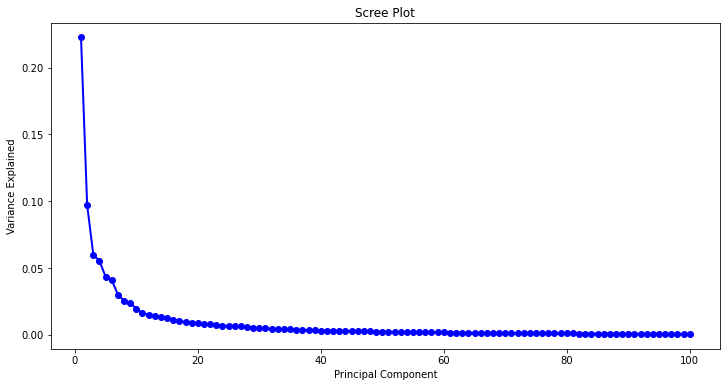

In [13]:
#Plotting the scree plot
plt.figure(figsize=(12,6))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [14]:
#Keeping the top 50 PCs only in the dataset

pca = PCA(n_components = 60)
df_pca = pca.fit_transform(X=X)

# Store as dataframe and print
df_pca = pd.DataFrame(df_pca)
df_pca.round(2).shape


(3147, 60)

In [16]:
variances = pca.explained_variance_ratio_.round(4).reshape(1,-1)
percentage = (variances*100).reshape(1,-1)
var=np.cumsum(np.round(variances, decimals=4)*100).reshape(1,-1)
r=np.arange(1,61)
final= [r , variances[0], percentage[0], var[0] ]
final
df = pd.DataFrame(data = final) #, columns =['PCA#' , 'Variance' , 'Percentage'])
df1=df.T
columns = ['PC#' , 'Variance', 'Percentage', 'Cumulative var']
df1.columns = columns
n = df1.shape[0]
# df1
df1['Cumulative var'][n-1]


89.41000000000001

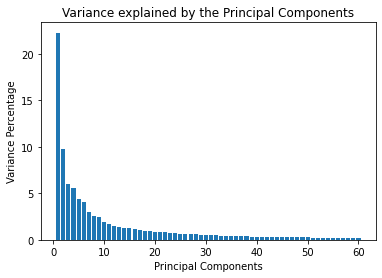

In [17]:
plt.bar(r, height = pca.explained_variance_ratio_.round(4)*100)
plt.xlabel("Principal Components")
plt.ylabel("Variance Percentage")
plt.title("Variance explained by the Principal Components")
plt.show()

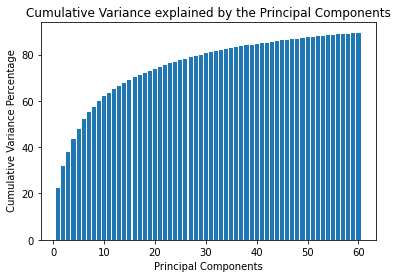

In [18]:
plt.bar(r, height = np.cumsum(np.round(variances, decimals=4)*100))
plt.xlabel("Principal Components")
plt.ylabel(" Cumulative Variance Percentage")
plt.title("Cumulative Variance explained by the Principal Components")
plt.show()

In [ ]:
df_pca

In [19]:
df_pca['y']=Y
df_pca

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,y
0,-134.272411,107.740102,-544.923409,313.075995,-500.134982,163.354256,-223.046212,-460.862253,1016.398110,206.766560,...,42.602055,-93.659726,-221.574389,-35.391877,-38.017084,122.707460,-28.593008,115.049793,-61.276908,2
1,-970.415120,-371.815822,114.480754,-339.005162,-53.982530,-106.119979,19.826584,-443.883799,-220.422325,69.631539,...,-20.597141,-110.664732,-43.595365,31.060287,121.922102,-60.386119,25.127856,33.301005,37.621657,1
2,1267.529703,-263.230207,-35.686933,612.758736,-734.466507,267.736221,363.049391,-130.846209,-160.311147,-353.753833,...,-144.877853,13.339952,7.457897,-47.698752,-12.616132,119.992074,-61.984407,105.502626,-76.682506,0
3,-1066.123553,-239.331642,137.988621,-424.366232,-174.547096,209.850340,57.164608,-316.860851,-325.027736,148.858644,...,-39.592187,-80.008487,-53.411930,83.659488,25.943930,-51.652728,27.315894,57.024636,-71.252757,1
4,1037.176916,-427.394186,-700.740250,-566.284242,134.667725,-584.412757,-546.833432,-70.674786,52.580772,306.396613,...,24.489266,-30.323406,-114.327328,32.469433,-1.893377,-1.616113,-21.883052,-13.302336,-110.862376,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,-1018.214154,-466.254488,28.869654,230.822879,-86.809624,381.402311,-161.224385,-116.844293,-362.088175,197.669102,...,9.593185,26.179907,4.349131,-7.186691,-38.997411,-59.216322,36.285084,-36.479123,-52.979009,1
3143,-31.910688,532.992544,-725.466820,99.339390,-203.097494,275.152763,-263.029654,381.752778,-995.475767,-504.893288,...,16.755325,-64.871690,-141.343747,-66.158009,90.058201,-58.175278,-73.058987,-42.327678,263.097702,2
3144,1467.868047,-268.859552,635.240891,-466.368314,-162.052081,1172.372584,-91.875599,437.256561,644.772418,164.700672,...,-10.855133,-54.630713,-26.899385,25.077866,25.995951,-36.552934,60.502365,157.463790,177.142361,0
3145,-1070.029279,-119.693078,180.788257,-271.003026,-213.400906,409.351278,-138.321388,-249.781278,-284.347897,214.286982,...,30.429529,-29.842902,45.963477,-3.360102,-77.927819,-16.357453,4.740288,-78.742302,-44.376363,1


In [20]:
df_pca.shape

(3147, 61)